In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle
import xgboost as xgb
from xgboost import XGBClassifier
from joblib import dump

In [2]:
# read the data
data = pd.read_csv("combine_test_data.csv")
test_data = data.sample(frac=1).reset_index(drop=True)

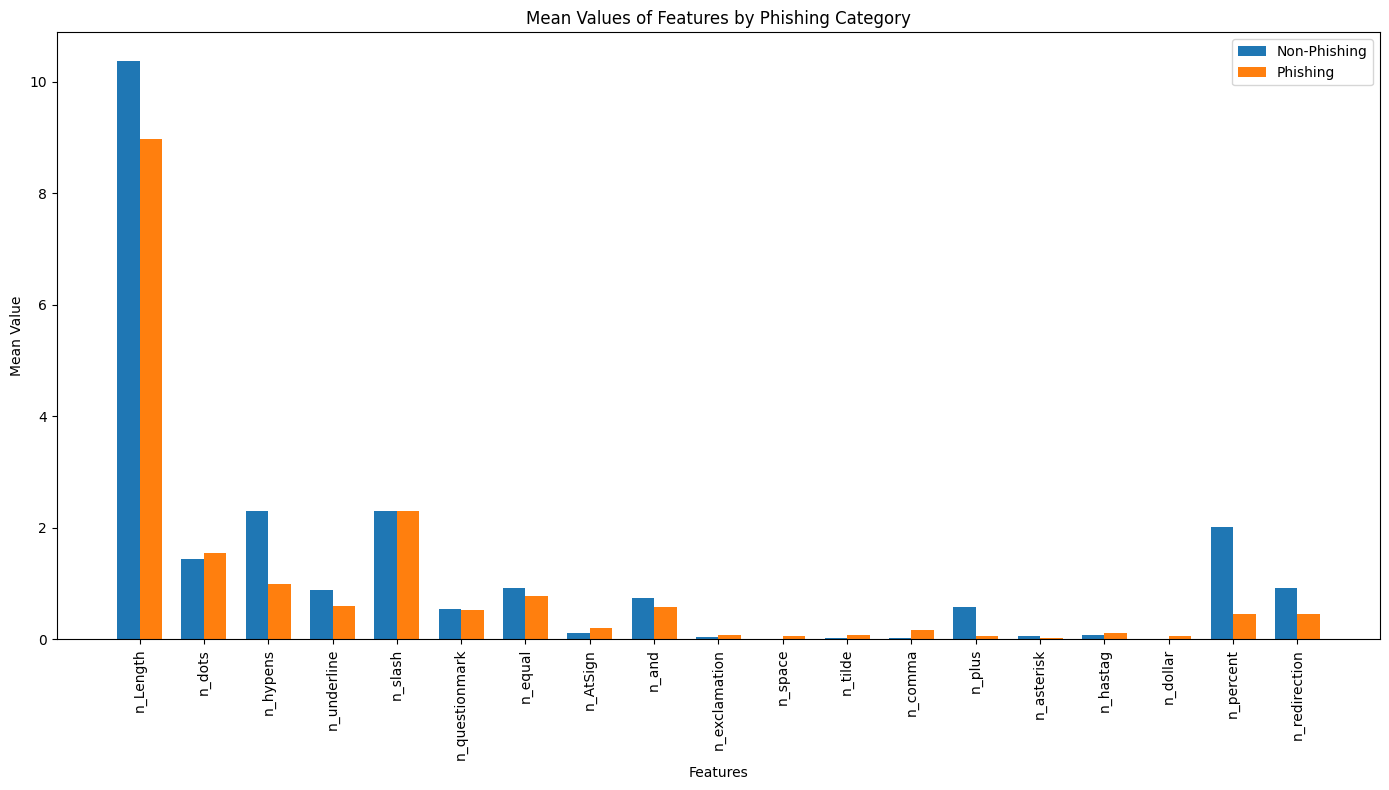

In [3]:
descriptive_stats = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].groupby('label').describe()
stat_data = descriptive_stats.xs('mean', level=1, axis=1)
stat_data = np.sqrt(stat_data)

n_features = len(stat_data.columns)
index = np.arange(n_features)
bar_width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(index, stat_data.iloc[0], bar_width, label='Non-Phishing')
plt.bar(index + bar_width, stat_data.iloc[1], bar_width, label='Phishing')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features by Phishing Category')
plt.xticks(index + bar_width / 2, stat_data.columns, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# split the dataset and make the train and test data sets
X = test_data.drop(['label'],axis=1).values
y = test_data['label'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [5]:
# make XGB model
model = xgb.XGBClassifier(objective='binary:logistic',
                                learning_rate=0.4,
                                max_depth=10,
                                )
#fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [6]:
#predicting the target value from the model for the samples
all_preds = model.predict(X_test)
y_train_xgb = model.predict(X_train)

#computing the accuracy of the model performance
all_targets = y_test
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(all_targets,all_preds)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.975
XGBoost : Accuracy on test Data: 0.944


In [7]:
accuracy = accuracy_score(all_targets, all_preds)
print(accuracy)

0.9441666666666667


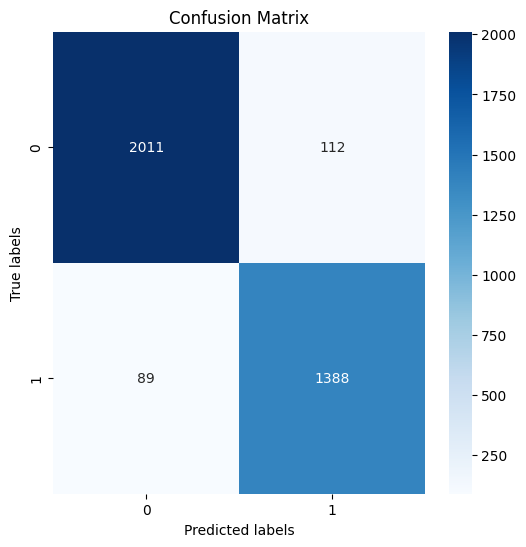

In [8]:
# make confusion matrix
conf_mat = confusion_matrix(all_targets, all_preds)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

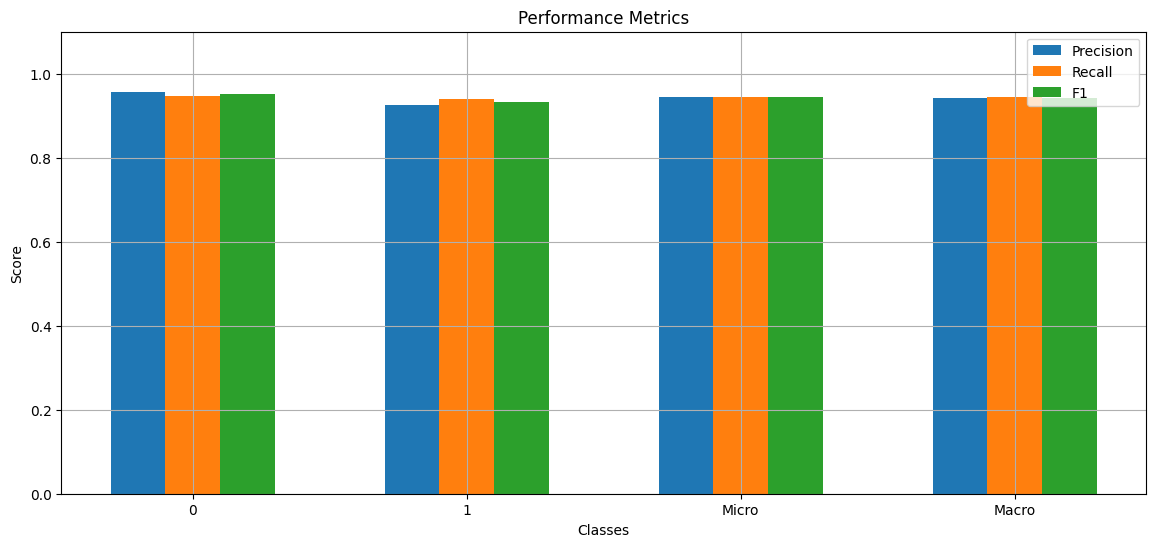

In [9]:
num_classes = 2
# make performance metrics for each classes
# define the values in normal, micro and macro state
precision = precision_score(all_targets, all_preds, average=None)
precision_micro = precision_score(all_targets, all_preds, average='micro')
precision_macro = precision_score(all_targets, all_preds, average='macro')

recall = recall_score(all_targets, all_preds, average=None)
recall_micro = recall_score(all_targets, all_preds, average='micro')
recall_macro = recall_score(all_targets, all_preds, average='macro')

f1 = f1_score(all_targets, all_preds, average=None)
f1_micro = f1_score(all_targets, all_preds, average='micro')
f1_macro= f1_score(all_targets, all_preds, average='macro')

precision = np.append(precision, [precision_micro, precision_macro])
recall = np.append(recall, [recall_micro, recall_macro])
f1 = np.append(f1, [f1_micro, f1_macro])
classes = list(range(num_classes)) + ['Micro', 'Macro']

x = np.arange(len(classes))
width = 0.2

fig1, ax1 = plt.subplots(figsize=(14, 6))
rects1 = ax1.bar(x - width, precision, width, label='Precision')
rects2 = ax1.bar(x, recall, width, label='Recall')
rects3 = ax1.bar(x + width, f1, width, label='F1')
# make performance diagram
ax1.set_xlabel('Classes')
ax1.set_ylabel('Score')
ax1.set_title('Performance Metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(classes)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper right')
ax1.grid(True)
plt.show()

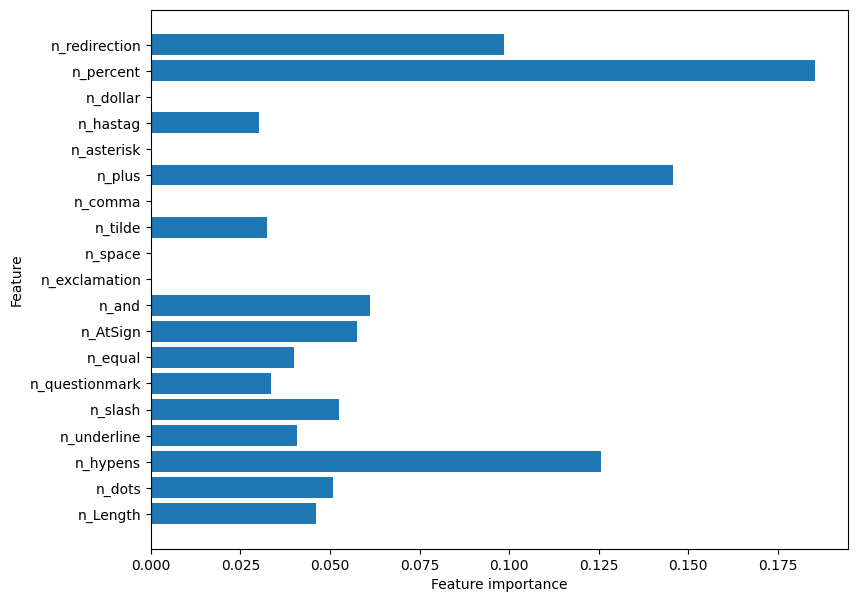

In [10]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
feature_names = test_data.drop(['label'], axis=1).columns
n_features = X_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [11]:
dump(model, 'final_model.joblib') 

['final_model.joblib']